<a href="https://colab.research.google.com/github/MRI-2021/Computer-science-fundamentals/blob/main/Analysis%20member_activity_and_%20demographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving member_activity.csv to member_activity.csv


In [4]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['member_activity.csv']))
# Activity dataset is now stored in a Pandas Dataframe

In [5]:
from google.colab import files
uploaded = files.upload()

Saving member_demographics.csv to member_demographics.csv


In [6]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['member_demographics.csv']))
# Demographic dataset is now stored in a Pandas Dataframe

In [7]:
print('\n============= HEAD ACTIVITY =============')
print(df1.head(3))
print('\n============= HEAD DEMOGRAPHIC =============')
print(df2.head(3))
print('\n============= DESCRIBE ACTIVITY =============')
print(df1.describe())
print('\n============= DESCRIBE DEMOGRAPHIC =============')
print(df2.describe())


============= HEAD ACTIVITY =============
   member_id  ftd  ftb  bet_5  acquisition_cost  bets_1_week  bets_4_weeks  \
0     868104    1    1      0          0.000000            2             2   
1     868236    1    1      0         26.046512            3             3   
2     868283    1    1      1          0.000000           10            16   

   retained_1_week  retained_4_weeks first_bet_category  deposits_12_weeks  \
0                0                 0       Horse Racing                1.0   
1                0                 0           Football                1.0   
2                1                 1           Football               16.0   

   deposit_amount_12_weeks  bets_12_weeks  stake_12_weeks  revenue_12_weeks  
0                     20.0              2       19.999990         27.999986  
1                     20.0              3      102.269891         27.991587  
2                   1600.0             32     3135.739803      -1789.131460  

============= HEAD

In [8]:
## Set the index to member id
df1_i = df1.set_index('member_id')
df1_i.sort_index(ascending=True)

,ftd,ftb,bet_5,acquisition_cost,bets_1_week,bets_4_weeks,retained_1_week,retained_4_weeks,first_bet_category,deposits_12_weeks,deposit_amount_12_weeks,bets_12_weeks,stake_12_weeks,revenue_12_weeks
member_id,,,,,,,,,,,,,,
868041,1,1,1,12.328889,19,27,1,1,Horse Racing,15.0,290.0,34,502.379507,-1415.236330
868045,1,0,0,29.556611,0,0,0,0,NaN,1.0,20.0,0,0.000000,0.000000
868048,0,0,0,0.000000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000
868049,0,0,0,0.000000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000
868050,0,0,0,0.000000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919271,1,1,1,0.000000,37,42,1,1,Accumulator,30.0,470.0,138,1184.278978,-148.471910
919281,0,0,0,0.000000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000
919288,0,0,0,0.000000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000


In [9]:
## Set the index to member id
df2_i = df2.set_index('member_id')
df2_i.sort_index(ascending=True)

,signup_datetime,age,member_type,signup_source,signup_channel
member_id,,,,,
868041,2021-01-01 00:48:55.736467,20,Customer,Paid,Apple
868045,2021-01-01 01:37:51.653839,20,Customer,Affiliate,Odds Comparison
868048,2021-01-01 01:44:53.356374,46,Customer,Organic,Organic
868049,2021-01-01 01:45:33.428287,34,Customer,Organic,Organic
868050,2021-01-01 01:46:15.470817,30,Customer,Organic,Organic
...,...,...,...,...,...
919271,2021-03-31 21:20:02.330705,37,Customer,Organic,Organic
919281,2021-03-31 22:08:04.841143,24,Customer,Organic,Organic
919288,2021-03-31 22:53:31.504273,43,Customer,Organic,Organic


In [10]:
## Inner join the two talbes
df_j = pd.concat([df1_i, df2_i], axis=1, join="inner")

In [11]:
print('\n============= HEAD ACTIVITY & DEMOGRAPHIC =============')
print(df_j.head(3))
print('\n============= DESCRIBE ACTIVITY & DEMOGRAPHIC =============')
print(df_j.describe())


============= HEAD ACTIVITY & DEMOGRAPHIC =============
           ftd  ftb  bet_5  acquisition_cost  bets_1_week  bets_4_weeks  \
member_id                                                                 
868104       1    1      0          0.000000            2             2   
868236       1    1      0         26.046512            3             3   
868283       1    1      1          0.000000           10            16   

           retained_1_week  retained_4_weeks first_bet_category  \
member_id                                                         
868104                   0                 0       Horse Racing   
868236                   0                 0           Football   
868283                   1                 1           Football   

           deposits_12_weeks  deposit_amount_12_weeks  bets_12_weeks  \
member_id                                                              
868104                   1.0                     20.0              2   
868236         

In [12]:
df_j.sort_index(ascending=True)

,ftd,ftb,bet_5,acquisition_cost,bets_1_week,bets_4_weeks,retained_1_week,retained_4_weeks,first_bet_category,deposits_12_weeks,deposit_amount_12_weeks,bets_12_weeks,stake_12_weeks,revenue_12_weeks,signup_datetime,age,member_type,signup_source,signup_channel
member_id,,,,,,,,,,,,,,,,,,,
868041,1,1,1,12.328889,19,27,1,1,Horse Racing,15.0,290.0,34,502.379507,-1415.236330,2021-01-01 00:48:55.736467,20,Customer,Paid,Apple
868045,1,0,0,29.556611,0,0,0,0,NaN,1.0,20.0,0,0.000000,0.000000,2021-01-01 01:37:51.653839,20,Customer,Affiliate,Odds Comparison
868048,0,0,0,0.000000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000,2021-01-01 01:44:53.356374,46,Customer,Organic,Organic
868049,0,0,0,0.000000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000,2021-01-01 01:45:33.428287,34,Customer,Organic,Organic
868050,0,0,0,0.000000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000,2021-01-01 01:46:15.470817,30,Customer,Organic,Organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919271,1,1,1,0.000000,37,42,1,1,Accumulator,30.0,470.0,138,1184.278978,-148.471910,2021-03-31 21:20:02.330705,37,Customer,Organic,Organic
919281,0,0,0,0.000000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000,2021-03-31 22:08:04.841143,24,Customer,Organic,Organic
919288,0,0,0,0.000000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000,2021-03-31 22:53:31.504273,43,Customer,Organic,Organic


In [13]:
print('\n============= INFO ACTIVITY & DEMOGRAPHIC =============')
df_j.info()


============= INFO ACTIVITY & DEMOGRAPHIC =============
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18963 entries, 868104 to 918516
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ftd                      18963 non-null  int64  
 1   ftb                      18963 non-null  int64  
 2   bet_5                    18963 non-null  int64  
 3   acquisition_cost         18963 non-null  float64
 4   bets_1_week              18963 non-null  int64  
 5   bets_4_weeks             18963 non-null  int64  
 6   retained_1_week          18963 non-null  int64  
 7   retained_4_weeks         18963 non-null  int64  
 8   first_bet_category       11039 non-null  object 
 9   deposits_12_weeks        11824 non-null  float64
 10  deposit_amount_12_weeks  11824 non-null  float64
 11  bets_12_weeks            18963 non-null  int64  
 12  stake_12_weeks           18963 non-null  float64
 13  revenue_12_we

In [14]:
## Dataframe sorting when using .loc
df_j.loc[(df_j.revenue_12_weeks > 0),].sort_values(by=['revenue_12_weeks'], ascending=False)

,ftd,ftb,bet_5,acquisition_cost,bets_1_week,bets_4_weeks,retained_1_week,retained_4_weeks,first_bet_category,deposits_12_weeks,deposit_amount_12_weeks,bets_12_weeks,stake_12_weeks,revenue_12_weeks,signup_datetime,age,member_type,signup_source,signup_channel
member_id,,,,,,,,,,,,,,,,,,,
904309,1,1,1,0.000000,25,38,1,1,Football,49.0,19045.000000,104,38365.497223,22471.062912,2021-03-08 21:09:12.952564,46,Customer,Organic,Organic
894491,1,1,1,10.795800,41,188,1,1,Horse Racing,91.0,31364.000000,447,63440.282299,21104.297483,2021-02-18 15:14:31.221776,34,Customer,Paid,Ad Networks
898095,1,1,1,17.485280,31,78,1,1,Horse Racing,85.0,20955.000000,325,43054.907531,17501.391282,2021-02-24 17:22:41.19956,44,Customer,Affiliate,Ad Network
895892,1,1,1,0.000000,172,949,1,1,Horse Racing,421.0,43345.210000,2972,176762.283211,11880.309755,2021-02-20 17:13:43.747233,56,Customer,Paid,Ad Networks
872265,1,1,1,0.466909,14,14,1,1,Horse Racing,20.0,10900.000000,1032,98153.073560,11810.343391,2021-01-09 05:36:41.664134,40,Customer,Paid,Ad Networks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892463,1,1,1,0.000000,5,5,0,0,Football,1.0,7.209499,5,2.883727,0.222519,2021-02-14 18:20:08.46724,30,Customer,Organic,Organic
880775,1,1,0,0.000000,0,1,1,0,Tennis,1.0,200.000000,1,28.419972,0.096629,2021-01-24 15:00:14.438657,22,Customer,Organic,Organic
880043,1,1,0,0.000000,2,2,0,0,Tennis,1.0,20.000000,2,0.099992,0.073849,2021-01-23 11:44:33.680894,21,Customer,Organic,Organic


In [15]:
## How many customers did we have to pay for?
df_j.loc[(df_j.acquisition_cost > 0),].sort_values(by=['acquisition_cost'], ascending=False)

,ftd,ftb,bet_5,acquisition_cost,bets_1_week,bets_4_weeks,retained_1_week,retained_4_weeks,first_bet_category,deposits_12_weeks,deposit_amount_12_weeks,bets_12_weeks,stake_12_weeks,revenue_12_weeks,signup_datetime,age,member_type,signup_source,signup_channel
member_id,,,,,,,,,,,,,,,,,,,
879932,0,0,0,466.087000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000,2021-01-23 06:40:37.055995,26,Customer,Paid,Social
880560,1,1,0,466.087000,1,3,1,1,Accumulator,1.0,146.113384,4,160.142365,224.043914,2021-01-24 05:46:07.488877,37,Customer,Paid,Social
879929,0,0,0,466.087000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000,2021-01-23 05:47:53.495975,39,Customer,Paid,Social
880550,0,0,0,466.087000,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000,2021-01-24 03:20:44.33332,31,Customer,Paid,Social
880172,1,1,0,466.087000,1,3,1,0,American Football,2.0,87.410668,3,101.970332,142.945590,2021-01-23 14:33:41.760287,57,Customer,Paid,Social
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906709,1,1,0,0.198069,2,2,1,1,Accumulator,2.0,30.000000,3,30.999980,43.399972,2021-03-13 14:14:33.177708,20,Customer,Paid,Ad Networks
907110,0,0,0,0.198069,0,0,0,0,NaN,NaN,NaN,0,0.000000,0.000000,2021-03-14 09:25:38.486613,32,Customer,Paid,Ad Networks
905580,1,1,1,0.198069,5,5,0,0,Accumulator,2.0,30.000000,5,54.999984,-141.408703,2021-03-11 16:21:19.675969,19,Customer,Paid,Ad Networks


In [16]:
## Do we have a limited number of acquisition costs directly linked to the signup channels?
## Not really, there are more that 195 types of cost but only 11 signup channels and 3 signup source (Affiliate, Organic, Paid).
# df_gb = df_j.groupby(['acquisition_cost'])
# df_agg = df_gb.agg({'acquisition_cost': 'size'})
# df_agg

In [17]:
## Using the pandas dataframe nunique() function with default parameters gives a count of all the distinct values in each column.
print(df_j.nunique())

ftd                            2
ftb                            2
bet_5                          2
acquisition_cost             195
bets_1_week                  215
bets_4_weeks                 360
retained_1_week                2
retained_4_weeks               2
first_bet_category            24
deposits_12_weeks            154
deposit_amount_12_weeks     1396
bets_12_weeks                481
stake_12_weeks              7104
revenue_12_weeks            7325
signup_datetime            18963
age                           76
member_type                    2
signup_source                  3
signup_channel                11
dtype: int64


In [18]:
## What are the types of signup source and how many of them do we have?
# df_gb = df_j.groupby(['signup_source'])
# df_agg = df_gb.agg({'signup_source': 'size'})
# df_agg

In [19]:
## Do we have acquisition costs for customers that don't put any first deposit (they never deposited money)?
## YES! Does it mean that they don't produce any revenue? That would be very damaging (but can they cause negative revenue?)
# df_gb = df_j.loc[(df_j.ftd == 0),].groupby(['ftd', 'acquisition_cost'])
# df_agg = df_gb.agg({'acquisition_cost': 'size'}, ascending=True)
# df_agg

In [20]:
## The customers that never made a deposit (ftd = 0) ALSO never produce revenue (revenue 12 weeks = 0)
## BUT there are acquisition costs!
# df_gb = df_j.loc[(df_j.ftd == 0),].groupby(['ftd', 'revenue_12_weeks', 'acquisition_cost'])
# df_agg = df_gb.agg({'revenue_12_weeks': 'size'}, ascending=True)
# df_agg

In [21]:
## How much money do we lose with these customer that never deposit?
## Almost £97K! (96520 to be more accurate)
# df_gb = df_j.loc[(df_j.ftd == 0),].groupby(['ftd', 'acquisition_cost'])

# Total_size = df_gb['acquisition_cost'].size()
# Total_sum = df_gb['acquisition_cost'].sum()

# ftd_loss = df_gb['acquisition_cost'].sum().sum()

# print('\n============= TOTAL SUM =============')
# print (Total_sum)
# print('\n============= TOTAL SIZE =============')
# print (Total_size)

# print('\n============= LOSS WHEN FTD = 0 =============')
# print(ftd_loss)

In [22]:
## How much money do we lose from customers that never bet (ftb = 0)?
# df_gb = df_j.loc[(df_j.ftb == 0),].groupby(['ftb', 'acquisition_cost'])
# df_agg = df_gb.agg({'acquisition_cost': 'size'}, ascending=True)
# df_agg

In [23]:
# df_gb = df_j.loc[(df_j.ftb == 0),].groupby(['ftb', 'revenue_12_weeks', 'acquisition_cost'])
# df_agg = df_gb.agg({'revenue_12_weeks': 'size'}, ascending=True)
# df_agg

In [24]:
## How much money do we lose with these customer that never bet?
## Almost £110K! (109284 to be more accurate)
## It is a bigger value only because I am considering more customers (never betting > never deposit)
## The biggest problem is that these costs are NOT caused by negative revenue (the revenue is this case is just 0) 
df_gb = df_j.loc[(df_j.ftb == 0)].groupby(['ftb', 'acquisition_cost'])

Total_size = df_gb['acquisition_cost'].size()
Total_sum = df_gb['acquisition_cost'].sum()

ftb_loss_a = df_gb['acquisition_cost'].sum().sum()
ftb_loss = 0 - ftb_loss_a

print('\n============= TOTAL SUM =============')
print (Total_sum)
print('\n============= TOTAL SIZE =============')
print (Total_size)

print('\n============= LOSS WHEN FTB = 0 =============')
print(ftb_loss)


============= TOTAL SUM =============
ftb  acquisition_cost
0    0.000000               0.000000
     0.198069               0.792276
     0.466909               5.136000
     0.712727               4.276364
     0.741000               2.223000
                            ...     
     250.368000           250.368000
     260.800000           260.800000
     261.268000          2351.412000
     280.280000           280.280000
     466.087000          2796.522000
Name: acquisition_cost, Length: 179, dtype: float64

============= TOTAL SIZE =============
ftb  acquisition_cost
0    0.000000            4339
     0.198069               4
     0.466909              11
     0.712727               6
     0.741000               3
                         ... 
     250.368000             1
     260.800000             1
     261.268000             9
     280.280000             1
     466.087000             6
Name: acquisition_cost, Length: 179, dtype: int64

============= LOSS WHEN FTB = 0 =====

In [25]:
## The majority of the custorers make at least one deposit ad at least one bet (11039)
## The minority makes one deposit but never bets (931)
## A portion NEVER makes the deposit and NEVER bet (6993)
# df_gb = df_j.groupby(['ftd', 'ftb'])
# df_agg = df_gb.agg({'ftd': 'size'}, ascending=True)
# df_agg


In [26]:
## How much money do we LOSE in total?
## We can add costs and negative revenues
## Almost £1,121K! (1120708 to be more accurate)

df_gb = df_j.loc[(df_j.revenue_12_weeks < 0)].groupby(df_j['revenue_12_weeks'])
neg_revenue = df_gb['revenue_12_weeks'].sum().sum()
print('\n============= NEG REVENUES =============')
print(neg_revenue)

print('\n============= NEG COSTS =============')
df_gb = df_j.loc[(df_j.acquisition_cost > 0)].groupby(df_j['acquisition_cost'])
neg_cost = df_gb['acquisition_cost'].sum().sum()
print(neg_cost)

print('\n============= TOT NEG =============')
tot_neg = neg_revenue - neg_cost
print(tot_neg)


============= NEG REVENUES =============
-839376.9096892964

============= NEG COSTS =============
281331.1536109661

============= TOT NEG =============
-1120708.0633002624


In [27]:
## How much money do we GAIN in total?
## Almost £1,487K! (1487192 to be more accurate)
df_gb = df_j.loc[(df_j.revenue_12_weeks > 0)].groupby(df_j['revenue_12_weeks'])
pos_revenue = df_gb['revenue_12_weeks'].sum().sum()
print('\n============= POS REVENUES =============')
print(pos_revenue)

## Let's double check the loss
double_check = tot_neg + pos_revenue
print('\n============= ? =============')
print(double_check)


============= POS REVENUES =============
1487192.7793360879

============= ? =============
366484.71603582543


In [28]:
## How much do we pay and get from our customers? (But we are talking about all the customers, not only the "new" customers)
## REMEMBER the costs have to be NEGATIVE!

sum_column = df_j['revenue_12_weeks'] - df_j['acquisition_cost']

# sum_column = df_j["acquisition_cost"] + df_j["revenue_12_weeks"]
df_j['cost_return'] = sum_column

print(df_j[['acquisition_cost', 'revenue_12_weeks', 'cost_return']].sort_values(by=['acquisition_cost'], ascending=False))

           acquisition_cost  revenue_12_weeks  cost_return
member_id                                                 
879929              466.087          0.000000  -466.087000
879980              466.087          0.000000  -466.087000
880473              466.087          0.000000  -466.087000
880560              466.087        224.043914  -242.043086
880172              466.087        142.945590  -323.141410
...                     ...               ...          ...
896887                0.000          0.000000     0.000000
897209                0.000         28.000000    28.000000
897460                0.000        138.014811   138.014811
897771                0.000         11.984125    11.984125
918516                0.000         27.999960    27.999960

[18963 rows x 3 columns]


In [29]:
## How much do we pay and get from our customers? (But we are talking about all the customers, not only the "new" customers)
## Almost £366K! (366484 to be more accurate)
## BUT how much of this revenue comes from "new" customers?

df_gb = df_j.groupby(['cost_return', 'revenue_12_weeks', 'acquisition_cost'])

cost_return_loss = df_gb['cost_return'].sum().sum()
print(cost_return_loss)

366484.71603582613


In [30]:
## Let's create a dataframe using these columns, to make the query faster.
df_j["signup_count"] = "1"

data = [df_j["ftd"], df_j["ftb"], df_j["bet_5"], df_j["retained_1_week"], df_j["retained_4_weeks"], df_j["signup_count"]]

headers = ["ftd", "ftb", "bet_5", "retained_1_week", "retained_4_weeks", "signup_count"]
df_graph = pd.concat(data, axis=1, keys=headers)
print(df_graph)

           ftd  ftb  bet_5  retained_1_week  retained_4_weeks signup_count
member_id                                                                 
868104       1    1      0                0                 0            1
868236       1    1      0                0                 0            1
868283       1    1      1                1                 1            1
868299       1    0      0                0                 0            1
868360       1    1      1                1                 0            1
...        ...  ...    ...              ...               ...          ...
918017       1    0      0                0                 0            1
918099       1    0      0                0                 0            1
918125       0    0      0                0                 0            1
918204       0    0      0                0                 0            1
918516       1    1      0                0                 0            1

[18963 rows x 6 columns]

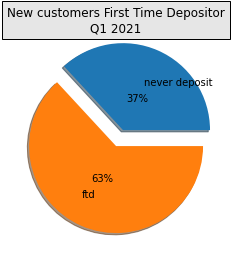

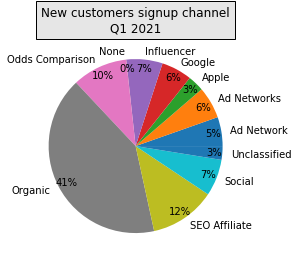

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
b = df_graph.ftd.sum()
a = df_graph.signup_count.count() - b
x = np.array([a, b])

mylabels = ["never deposit", "ftd"]
myexplode = [0.2, 0]
plt.pie(x, labels = mylabels, autopct='%1.0f%%', pctdistance=0.4, labeldistance=0.6, explode = myexplode, shadow = True)
#plt.legend(title = "Player quality metrics:")
plt.title("New customers First Time Depositor\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':5})

plt.figure(1)
size_channel = df_j.groupby('signup_channel').size()
size_channel.plot.pie(figsize=(4,4), autopct='%1.0f%%', pctdistance=0.9)
plt.title("New customers signup channel\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("")

plt.show()

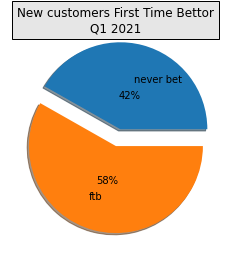

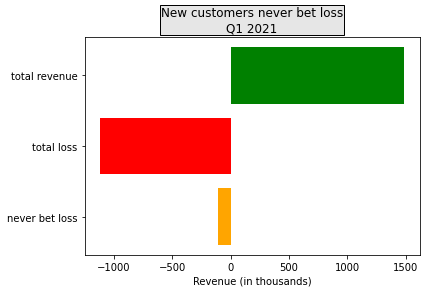

In [32]:
# ## How much money do we lose with these customer that never bet?
# df_gb = df_j.loc[(df_j.ftb == 0)].groupby(['ftb', 'acquisition_cost'])
# ftb_loss_a = df_gb['acquisition_cost'].sum().sum()
# ftb_loss = 0 - ftb_loss_a

# ## How much money do we LOSE in total?
# df_gb = df_j.loc[(df_j.revenue_12_weeks < 0)].groupby(df_j['revenue_12_weeks'])
# neg_revenue = df_gb['revenue_12_weeks'].sum().sum()

# df_gb = df_j.loc[(df_j.acquisition_cost > 0)].groupby(df_j['acquisition_cost'])
# neg_cost = df_gb['acquisition_cost'].sum().sum()

# tot_neg = neg_revenue - neg_cost

# ## How much money do we GAIN in total?
# df_gb = df_j.loc[(df_j.revenue_12_weeks > 0)].groupby(df_j['revenue_12_weeks'])
# pos_revenue = df_gb['revenue_12_weeks'].sum().sum()

import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
d = df_graph.ftb.sum()
c = df_graph.signup_count.count() - d
y = np.array([c, d])

mylabels = ["never bet", "ftb"]
myexplode = [0.2, 0]
plt.pie(y, labels = mylabels, autopct='%1.0f%%', pctdistance=0.4, labeldistance=0.6, explode = myexplode, shadow = True)
plt.title("New customers First Time Bettor\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':5})

plt.figure(1)
g = ftb_loss / 1000
h = tot_neg / 1000
i = pos_revenue / 1000

x = ["never bet loss", "total loss", "total revenue"]
y = np.array([g, h, i])
plt.barh(x, y, color=['orange', 'red', 'green'])

plt.title("New customers never bet loss\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':1})
plt.xlabel("Revenue (in thousands)")

plt.show()

import plotly.express as px

fig = px.pie(df_j, values='ftb', names='first_bet_category')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=22, uniformtext_mode='hide', title_text='New customers first bet category', title_x=0.45)

fig.show()

In [33]:
import plotly.express as px

fig = px.pie(df_j, values='ftb', names='age')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=22, uniformtext_mode='hide', title_text='New customers first bet age', title_x=0.45)

fig.show()

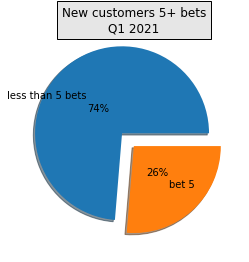

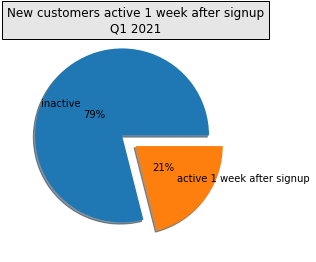

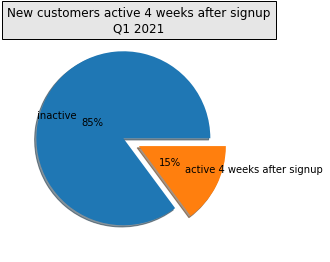

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
f = df_graph.bet_5.sum()
e = df_graph.signup_count.count() - f
z = np.array([e, f])

mylabels = ["less than 5 bets", "bet 5"]
myexplode = [0.2, 0]
plt.pie(z, labels = mylabels, autopct='%1.0f%%', pctdistance=0.4, labeldistance=0.6, explode = myexplode, shadow = True)
plt.title("New customers 5+ bets\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':5})

plt.figure(1)
h = df_graph.retained_1_week.sum()
g = df_graph.signup_count.count() - h
v = np.array([g, h])

mylabels = ["inactive", "active 1 week after signup"]
myexplode = [0.2, 0]
plt.pie(v, labels = mylabels, autopct='%1.0f%%', pctdistance=0.4, labeldistance=0.6, explode = myexplode, shadow = True)
plt.title("New customers active 1 week after signup\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':5})

plt.figure(2)
j = df_graph.retained_4_weeks.sum()
i = df_graph.signup_count.count() - i
u = np.array([i, j])

mylabels = ["inactive", "active 4 weeks after signup"]
myexplode = [0.2, 0]
plt.pie(u, labels = mylabels, autopct='%1.0f%%', pctdistance=0.4, labeldistance=0.6, explode = myexplode, shadow = True)
plt.title("New customers active 4 weeks after signup\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':5})

plt.show()

In [35]:
## Let's create a dataframe using these columns, to make the query faster.
df_j["acquisition_cost_neg"] = -1 * df_j.acquisition_cost

df_j["income"] = df_j.revenue_12_weeks + df_j.acquisition_cost_neg
# print(df_j.acquisition_cost_neg)
# print(df_j.revenue_12_weeks)
# print(df_j.income)

data = [df_j["acquisition_cost_neg"], df_j["revenue_12_weeks"], df_j["income"], df_j["retained_1_week"], df_j["retained_4_weeks"], df_j["signup_count"], df_j["ftd"], df_j["ftb"], df_j["bet_5"], df_j["deposit_amount_12_weeks"], df_j["stake_12_weeks"], df_j["bets_12_weeks"]]

headers = ["acquisition_cost_neg", "revenue_12_weeks", "income", "retained_1_week", "retained_4_weeks", "signup_count", "ftd", "ftb", "bet_5", "deposit_amount_12_weeks", "stake_12_weeks", "bets_12_weeks"]
df_graph = pd.concat(data, axis=1, keys=headers)
print(df_graph)

           acquisition_cost_neg  revenue_12_weeks       income  \
member_id                                                        
868104                -0.000000         27.999986    27.999986   
868236               -26.046512         27.991587     1.945076   
868283                -0.000000      -1789.131460 -1789.131460   
868299               -22.539683          0.000000   -22.539683   
868360                -0.000000        272.999086   272.999086   
...                         ...               ...          ...   
918017                -0.000000          0.000000     0.000000   
918099               -14.749425          0.000000   -14.749425   
918125                -0.000000          0.000000     0.000000   
918204                -0.000000          0.000000     0.000000   
918516                -0.000000         27.999960    27.999960   

           retained_1_week  retained_4_weeks signup_count  ftd  ftb  bet_5  \
member_id                                                      

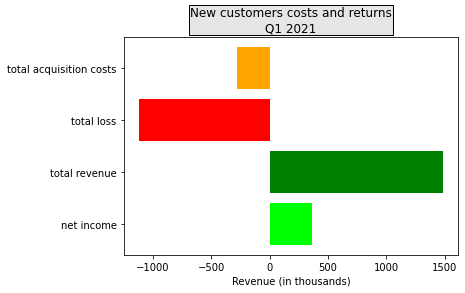

In [36]:
import matplotlib.pyplot as plt
import numpy as np

income = df_j.income.sum()
acquisition = df_j.acquisition_cost_neg.sum()

plt.figure(0)
g = income / 1000
h = tot_neg / 1000
i = pos_revenue / 1000
j = acquisition / 1000

x = ["net income", "total revenue", "total loss", "total acquisition costs"]
y = np.array([g, i, h, j])
plt.barh(x, y, color=['lime', 'green', 'red', 'orange'])

plt.title("New customers costs and returns\n" + "Q1 2021", bbox={'facecolor':'0.9', 'pad':1})
plt.xlabel("Revenue (in thousands)")

plt.show()

import plotly.express as px

fig = px.pie(df_graph, values='income', names='retained_1_week')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=22, uniformtext_mode='hide', title_text='Income generated by new customers active 1 week after signup', title_x=0.8)

fig.show()

In [37]:
import plotly.express as px

fig = px.pie(df_graph, values='income', names='retained_4_weeks')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=22, uniformtext_mode='hide', title_text='Income generated by new customers active 4 weeks after signup', title_x=0.8)

fig.show()

In [38]:
import plotly.express as px
df_graph["acquisition_p"] = df_j.acquisition_cost

fig = px.pie(df_graph, values='acquisition_p', names='retained_1_week', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=22, uniformtext_mode='hide', title_text='Acquisition costs generated by new customers inactive 1 week after signup', title_x=0.85)

fig.show()

In [39]:
import plotly.express as px
df_graph["acquisition_p"] = df_j.acquisition_cost

fig = px.pie(df_graph, values='acquisition_p', names='retained_4_weeks', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=22, uniformtext_mode='hide', title_text='Acquisition costs generated by new customers inactive 4 weeks after signup', title_x=0.85)

fig.show()

In [40]:
# df_graph.info()

# df_graph.retained_1_week.sum()
# df_graph.retained_4_weeks.sum()

import plotly.express as px

fig = px.pie(df_graph, values='deposit_amount_12_weeks', names='retained_1_week')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=22, uniformtext_mode='hide', title_text='Deposit amount of new customers active 1 week after signup', title_x=0.8)

fig.show()

In [41]:
import plotly.express as px

fig = px.pie(df_graph, values='deposit_amount_12_weeks', names='retained_4_weeks')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=22, uniformtext_mode='hide', title_text='Deposit amount of new customers active 4 weeks after signup', title_x=0.8)

fig.show()

In [42]:
# df_j.info()

import plotly.express as px

fig = px.pie(df_graph, values='bets_12_weeks', names='retained_1_week', color_discrete_sequence=px.colors.sequential.Viridis_r)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=22, uniformtext_mode='hide', title_text='Bets of new customers active 1 week after signup', title_x=0.8)

fig.show()

In [43]:
import plotly.express as px

fig = px.pie(df_graph, values='bets_12_weeks', names='retained_4_weeks', color_discrete_sequence=px.colors.sequential.Viridis_r)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=22, uniformtext_mode='hide', title_text='Bets of new customers active 4 weeks after signup', title_x=0.8)

fig.show()